In [191]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Convolution2D, Flatten, MaxPooling2D, Dense, Activation, Dropout
from keras.optimizers import Adam
from keras.utils import np_utils

import matplotlib.pyplot as plt
import matplotlib.image as processimage
from PIL import Image

In [192]:
# load mnist dataset
# only use the first 100 labels
(data_train,label_train),(data_test,label_test) = mnist.load_data()
data_train_arr = np.array(data_train)
data_train_arr = np.expand_dims(data_train_arr[0:200],axis = 3)
data_test_arr = np.array(data_test)
data_test_arr = np.expand_dims(data_test_arr[0:200],axis = 3)
label_train_arr = np.array(label_train[0:200])
label_test_arr = np.array(label_test[0:200])

In [193]:
# prepare the data reshape the data to vector
# data_train = data_train.reshape(60000,28*28)
# data_test = data_test.reshape(10000,28*28)
# set the type into float32
data_train_arr = data_train_arr.astype('float32')
data_test_arr = data_test_arr.astype('float32')
# normalize the data
data_train_arr = data_train_arr / 255.0
data_test_arr = data_test_arr / 255.0

In [194]:
print (data_train_arr.shape)
print (label_train_arr.shape)
print (label_train_arr[0:200])

(200, 28, 28, 1)
(200,)
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1 5 7 1 7 1 1 6 3 0 2 9
 3 1 1 0 4 9 2 0 0 2 0 2 7 1 8 6 4 1 6 3 4 5 9 1 3 3 8 5 4 7 7 4 2 8 5 8 6
 7 3 4 6 1 9 9 6 0 3 7 2 8 2 9 4 4 6 4 9 7 0 9 2 9 5 1 5 9 1 2 3 2 3 5 9 1
 7 6 2 8 2 2 5 0 7 4 9 7 8 3 2]


In [195]:
color_weight = [1.00,0.95,0.85,0.75,0.65]
for num in range (0,10):
    dir_path = 'fig/fig/train/num'
    folder_path = dir_path + str(num) + '/train_num' + str(num) + '_'
    for num_img_1 in range(0,5):
        img_path = folder_path + str(num_img_1) + '.png'
        img_train = Image.open(img_path).convert('L')
        if img_train.size[0]!=28 or img_train.size[0]!=28:
            img_train = img_train.resize((28,28))
        test_arr = []
        num_of_color = 0
        col = 0
        row = 0
        for num_of_color in range(0,5):
            for col in range(28):
                for row in range(28):
                    pixel = 1 - float(img_train.getpixel((row,col))) * color_weight[num_of_color] / 255.0
                    test_arr.append(pixel)
            train_2d = np.array(test_arr).reshape((28,28))
            train_2d = np.expand_dims(train_2d,axis = 0)
            train_2d = np.expand_dims(train_2d,axis = 3)
            data_train_arr = np.concatenate((data_train_arr,train_2d))
            label_train_arr = np.concatenate((label_train_arr,[num]),axis = 0)
            test_arr.clear()
#             print('-------------------------------------')
#             print('the number is ' + str(num))
#             print('the index of img is ' + str(num_img_1))
#             print('the index of color is ' + str(num_of_color))
#             print('the shape of data img')
#             print(train_2d.shape)
#             print('the shape of of data set')
#             print(data_train_arr.shape)
#             print('the shape of label data')
#             print(label_train_arr.shape)
#             print('the input label')
#             print(label_train_arr[-1])


# for i in range(3,10):
#     path = 'fig/training/train_num' + str(i) + '.png'
#     img_train = Image.open(path).convert('L')
#     if img_train.size[0]!=28 or img_train.size[0]!=28:
#         img_train = img_train.resize((28,28))
#     plt.imshow(img_train)
#     test_arr = []
#     for k in range(28):
#         for j in range(28):
#             pixel = 1 - float(img_train.getpixel((j,k))) / 255.0
#             test_arr.append(pixel)
#     train_2d = np.array(test_arr).reshape((28,28))
#     plt.imshow(train_2d)
#     train_2d = np.expand_dims(train_2d,axis = 0)
#     train_2d = np.expand_dims(train_2d,axis = 3)
#     data_train_arr = np.concatenate((data_train_arr,train_2d))
#     label_train_arr = np.concatenate((label_train_arr,[i]),axis = 0)
#     print (data_train_arr.shape)
#     print (label_train_arr.shape)

In [196]:
# predefine the para for the network
batch_size = 50
num_of_class = 10
num_of_epochs = 60

In [197]:
# class vector
label_test_arr = np_utils.to_categorical(label_test_arr,num_of_class)
label_train_arr = np_utils.to_categorical(label_train_arr,num_of_class)
# data_test_arr = np.expand_dims(data_test_arr,axis = 3)
# data_train_arr = np.expand_dims(data_train_arr,axis = 3)

print(data_train_arr.shape)
print(label_train_arr.shape)

data_train_arr_3 = np.zeros((1,28,28,3))
#data_train_arr_3 = np.expand_dims(data_train_arr_3,axis = 3)
#data_train_arr_3 = np.dstack((data_train_arr_3,data_train_arr_3,data_train_arr_3))
print(data_train_arr_3.shape)

for data in data_train_arr:
    data = np.dstack((data,data,data))
    data = np.expand_dims(data,axis = 0)
    data_train_arr_3 = np.concatenate((data_train_arr_3,data))
print(data_train_arr_3.shape)
print(data_train_arr.shape)
data_train_arr_3 = np.delete(data_train_arr_3,0,0)
print(data_train_arr_3.shape)
print(data_train_arr_3[1].shape)

(450, 28, 28, 1)
(450, 10)
(1, 28, 28, 3)
(451, 28, 28, 3)
(450, 28, 28, 1)
(450, 28, 28, 3)
(28, 28, 3)


In [198]:
model = Sequential()


# origin mnist net work poor performance
# model.add(Dense(512,input_dim = 28*28))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

# model.add(Dense(10))
# model.add(Activation('softmax'))

# change to CNN

model.add(Convolution2D(
        input_shape = (28,28,3),
        filters = 32,
        kernel_size = (7,7),
        padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2),
    padding = 'same'
))


model.add(Convolution2D(
        filters = 64,
        kernel_size = (4,4),
        padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2),
    padding = 'same'
))



model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [199]:
adam = Adam(lr = 0.0001)

model.compile(
    loss = 'categorical_crossentropy',  #define the loss function
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [200]:
#start the network
Tranning = model.fit(
    data_train_arr_3,
    label_train_arr,
    batch_size = batch_size,
    epochs = num_of_epochs,
)

Epoch 1/60
9/9 [==============================] - 1s 89ms/step - loss: 2.3176 - accuracy: 0.1183
Epoch 2/60
9/9 [==============================] - 1s 87ms/step - loss: 1.9463 - accuracy: 0.3467
Epoch 3/60
9/9 [==============================] - 1s 88ms/step - loss: 1.5160 - accuracy: 0.4629
Epoch 4/60
9/9 [==============================] - 1s 87ms/step - loss: 1.4200 - accuracy: 0.4794
Epoch 5/60
9/9 [==============================] - 1s 86ms/step - loss: 1.3309 - accuracy: 0.5271
Epoch 6/60
9/9 [==============================] - 1s 88ms/step - loss: 1.2986 - accuracy: 0.5610
Epoch 7/60
9/9 [==============================] - 1s 89ms/step - loss: 1.1202 - accuracy: 0.6265
Epoch 8/60
9/9 [==============================] - 1s 88ms/step - loss: 1.0840 - accuracy: 0.6541
Epoch 9/60
9/9 [==============================] - 1s 89ms/step - loss: 1.0785 - accuracy: 0.6631
Epoch 10/60
9/9 [==============================] - 1s 87ms/step - loss: 1.0267 - accuracy: 0.7090
Epoch 11/60
9/9 [============

2


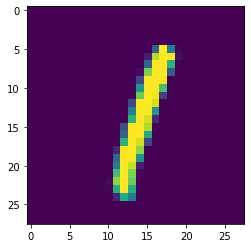

In [137]:
testrun = data_test[5].reshape(1,28*28)
testlabel = label_test[400]
print (testlabel)
plt.imshow(testrun.reshape([28,28]))

In [138]:
test_input = np.expand_dims(data_test_arr_3[5],axis = 0)
print(test_input.shape)

pred = model.predict(test_input)
print(pred)
# print(np.where(pred==np.max(pred)))

NameError: name 'data_test_arr_3' is not defined

In [201]:
from PIL import Image

In [204]:
img = Image.open('fig/fig/origin/num6.png').convert('L')

In [205]:
if img.size[0]!= 28 or img.size[1]!=28:
    img = img.resize((28,28))

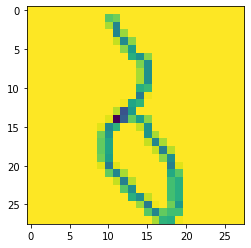

In [206]:
plt.imshow(img)

(1, 28, 28, 3)
[[1.5315283e-03 1.0728868e-04 2.3718114e-07 9.0571288e-05 1.2935253e-06
  2.2513798e-07 9.9826825e-01 4.6125319e-07 1.7528079e-07 1.0103256e-09]]
(array([0], dtype=int64), array([6], dtype=int64))


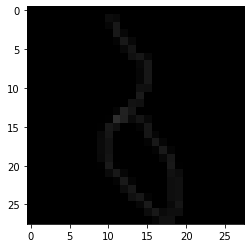

In [207]:
test_arr =[]
for i in range(28):
    for j in range(28):
        pixel = 1 - float(img.getpixel((j,i))) / 255.0
        test_arr.append(pixel)

# test_input = np.array(test_arr).reshape(1,28*28)
# plt.imshow(test_input.reshape((28,28)))
# pred = model.predict(test_input)
# print(pred)
# print(np.where(pred==np.max(pred)))

test_2d = np.array(test_arr).reshape((28,28))
plt.imshow(test_2d)
test_2d = np.dstack((test_2d,test_2d,test_2d))
plt.imshow(test_2d)
test_input = np.expand_dims(test_2d,axis = 0)
#test_input = np.expand_dims(test_input,axis = 3)
print(test_input.shape)
pred = model.predict(test_input)
print(pred)
print(np.where(pred==np.max(pred)))

In [189]:
model.save('./num_3.h5')

In [209]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.post_training_quantize = True
tflitemodel = converter.convert()
open("num_mobile_3.tflite","wb").write(tflitemodel)

INFO:tensorflow:Assets written to: C:\Users\ltopuser\AppData\Local\Temp\tmpa05ynga5\assets


INFO:tensorflow:Assets written to: C:\Users\ltopuser\AppData\Local\Temp\tmpa05ynga5\assets


15122984

In [32]:
print(data_train_arr.shape)
for data in data_train_arr:
    print(data.shape)
    data = np.dstack((data,data,data))
    print(data.shape)

(450, 28, 28, 1)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)
(28, 28, 1)
(28, 28, 3)